Paso 1. Prepara los datos

a. Reemplaza los nombres de las columnas (ponlos en minúsculas).

b. Convierte los datos en los tipos necesarios.

c. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

d. Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

Paso 2. Analiza los datos

a. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
Se observa cómo varían las ventas de una plataforma a otra. Elegiré las plataformas con las mayores ventas totales y construirá una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

b. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

c. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

d. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

e. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

f. Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Paso 3. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

a. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

b. Los cinco géneros principales. Explica la diferencia.

c. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Paso 4. Prueba de las siguientes hipótesis:

a. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

b. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Paso 5. Conclusión general

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## PASO 1. PREPARACION DE LOS DATOS

In [201]:
#leemos el csv
video_game = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\games\games\games (2).csv')
video_game.head()



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [202]:
#convertimos el nombre de las columnas en minusculas
lower_columns = []
for columns in video_game.columns:
    name_lower = columns.lower()
    lower_columns.append(name_lower)
    
video_game.columns = lower_columns
print(lower_columns)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [203]:
video_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [204]:
#rellenar los nulos con 0, cambiar el type de float a int de int a str y reemplazar '0' con None, para que se pueda borrar.
video_game['year_of_release'] = video_game['year_of_release'].fillna(0)
video_game['year_of_release'] = video_game['year_of_release'].astype(float)
video_game['year_of_release'] = video_game['year_of_release'].astype(int)
video_game['year_of_release'] = video_game['year_of_release'].astype(str)
video_game['year_of_release'] = video_game['year_of_release'].replace('0', None)

#rellenar los valores ausentes con 'no genre' en 'genre'
video_game['genre'] = video_game['genre'].fillna('no genre')

#rellenar valore ausentes en la columna rating con "No clasificacion"
video_game['rating'] = video_game['rating'].fillna('RP')

#rellenar lo valores ausentes con 0 en 'critic_score'
video_game['critic_score'] = video_game['critic_score'].fillna(0)

#reemplazar 'tbd' con 0 y rellenar valores ausente en 'user_score'
video_game['user_score'] = video_game['user_score'].replace('tbd', 0)
video_game['user_score'] = video_game['user_score'].fillna(0)


#Cambiar de int a numerico
video_game['user_score'] = video_game['user_score'].astype(float)


#eliminar valores ausente que no cooperan con el analisis
df_games = video_game.dropna(subset = ['name','year_of_release'])



df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  object 
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Columna 'year_of_release'
Rellenar nulos con 0: Esto se hace para convertir todos los valores nulos en un formato numérico y luego poder manipularlos.

Columna 'genre':
Rellenar nulos con 'no genre': Para los valores ausentes decidi colocarle un string de 'no genre' porque no especifica cual, por factores de falta de data historica, lo mas probable.

Columna 'raiting':
Rellenar nulos con 'RP' (Rating Pending): Esto se usa comúnmente en la industria de los videojuegos cuando no se ha determinado la clasificación de edad del juego.

Columna 'critic_score':
Rellenar nulos con 0: Los valores nulos en la puntuación de los críticos podrían significar que no hay una puntuación disponible.

Columna 'user_score':
Reemplazar 'tbd' con 0: 'TBD' (To Be Determined), reemplazarlo con 0 indica que no hay puntuación disponible en este momento.
Rellenar nulos con 0: Similar a critic_score, los valores nulos pueden indicar falta de datos, por lo que se rellenan con 0 para manejarlos como falta de información


SE RELLENAN CON 0 MAS QUE TODO POR FALTA DE INFORMACION EN LAS COLUMNAS Y DE UN DATO DEL MISMO TIPO PARA QUE ESTE SEA MANIPULABLE Y PUEDA SER UTIL PARA UN POSTERIOR ANALISIS DE LA DATA.

In [205]:
#Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego 
#y coloca estos valores en una columna separada.
#Se crea una columna que calcula por fila la suma de todas lsa regiones por juego.

df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games['average_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean(axis=1)

df_games.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_19840\3208450717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_19840\3208450717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['average_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean(axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,20.6350
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,8.8800
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,8.1925
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38,7.8450


## PASO 2. ANALISIS DE LOS DATOS

a. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [206]:
release_games = df_games.groupby('year_of_release')['name'].count().reset_index(name = 'counts')
release_games.head()

,year_of_release,counts
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


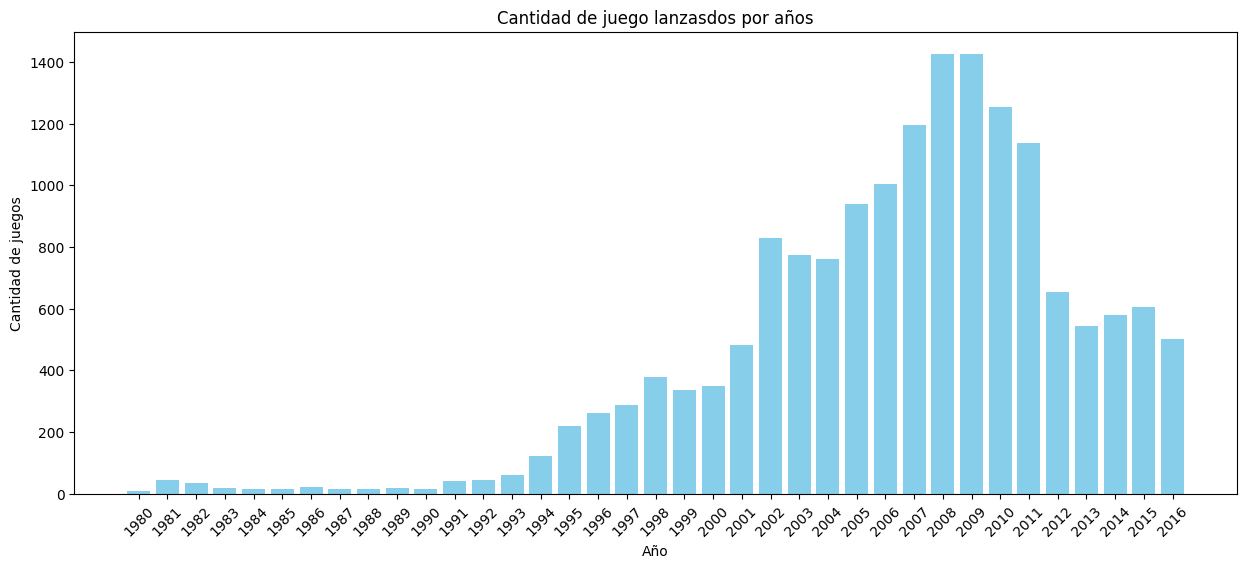

In [207]:
plt.figure(figsize=(15,6))
plt.bar(release_games['year_of_release'], release_games['counts'], color = 'skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.title('Cantidad de juego lanzasdos por años')
plt.xticks(rotation = 45)
plt.show()

b. Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

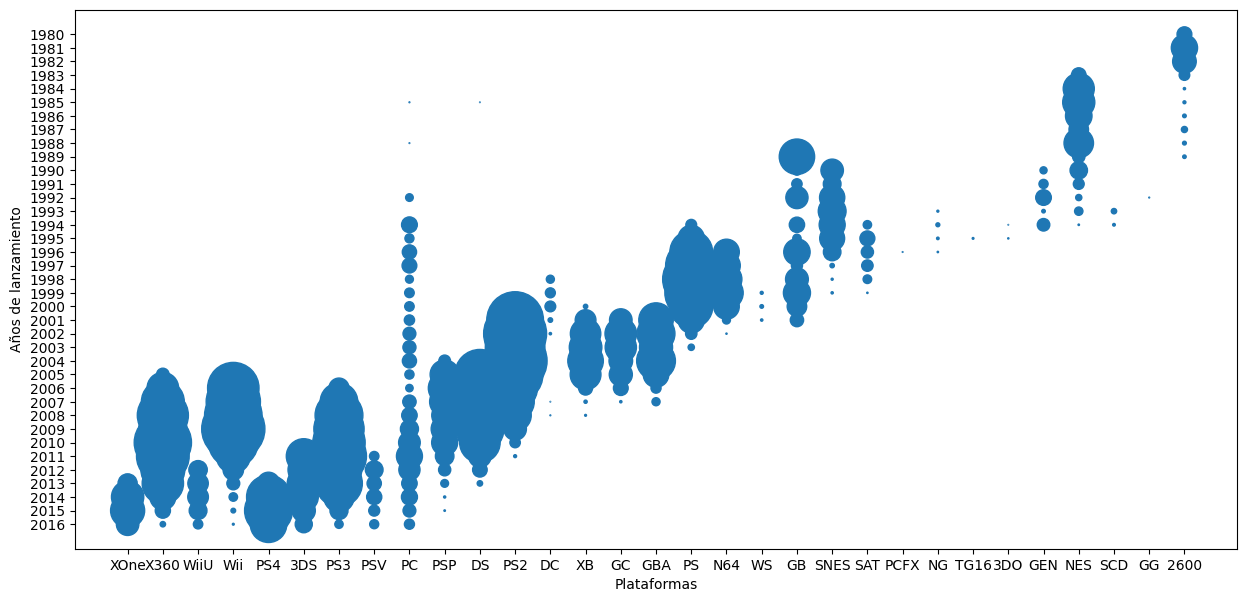

In [208]:
#imprimir las plataformas con mayores ventas totales por año y se acomodan lo valores de plataformas de manera descendente. 

#agrupamos por plataforma y año lanzado y sumamos sus ventas totales
platform_sales = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release', ascending = False)

#mostramos el grafico de dispersion
plt.figure(figsize = (15,7))

plt.scatter(platform_sales['platform'], platform_sales['year_of_release'], s=platform_sales['total_sales']*10)
plt.xlabel('Plataformas')
plt.ylabel('Años de lanzamiento')
plt.show()

De acuerdo al grafico de dispersion se puede apreciar que hay una fuerte demanda a partir de los años 2000, donde plataformas como XOne, PS3 x360 Wii PS2 han tenido ventas muy convenientes para la empresa respectiva, esto se debe a muchos factores. Además se ve que plataformas como el 2600 el PS entre otras han ido disminuyendo en sus ventas, esto por el simple hecho de que se han innovado en las tecnologias, y obviamente para su epoca era un auge, un gran avance tecnlogico.

In [209]:
#identificacion de plataformas antiguas con ventas minimas 

old_platform = df_games[df_games['year_of_release'] < '2000'].groupby('platform')['total_sales'].sum().sort_values().reset_index()
old_platform.head()

,platform,total_sales
0,DS,0.02
1,PCFX,0.03
2,GG,0.04
3,3DO,0.10
4,TG16,0.16


In [210]:
# Cálculo del tiempo de vida promedio de las plataformas

#agrupamos las plataformas por su año de lanzaminto y buscamos el minimo y maximo
platform_lifespans = df_games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

platform_lifespans.head()

,platform,min,max
0,2600,1980,1989
1,3DO,1994,1995
2,3DS,2011,2016
3,DC,1998,2008
4,DS,1985,2013


In [211]:
#lo convertimos a entero
platform_lifespans['min'] = platform_lifespans['min'].astype(int)
platform_lifespans['max'] = platform_lifespans['max'].astype(int)

platform_lifespans.head()

,platform,min,max
0,2600,1980,1989
1,3DO,1994,1995
2,3DS,2011,2016
3,DC,1998,2008
4,DS,1985,2013


In [212]:
#restamos el maximo y su minimo para encontrar su tiempo de vida
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']

platform_lifespans.head()


,platform,min,max,lifespan
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28


In [213]:
#filtramos el dataframe por año de lanzamiento menor a 2000
platform_before = platform_lifespans.query('min < 2000')


platform_before.head()

,platform,min,max,lifespan
0,2600,1980,1989,9
1,3DO,1994,1995,1
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13


In [214]:
#calculamos el promedio de tiempo de vida para las plataformas que son antes del 2000
average_lifespan_before = platform_before['lifespan'].mean()

print(f'El tiempo de vida promedio de las plataformas antiguas es de {average_lifespan_before}')

El tiempo de vida promedio de las plataformas antiguas es de 7.888888888888889


In [215]:
#filtramos el dataframe por año de lanzamiento mayor a 2000
platform_after  = platform_lifespans.query('min > 2000')
platform_after.head()

,platform,min,max,lifespan
2,3DS,2011,2016,5
7,GC,2001,2007,6
17,PS3,2006,2016,10
18,PS4,2013,2016,3
19,PSP,2004,2015,11


In [216]:
#calculamos el promedio de tiempo de vida para las plataformas que son antes del 2000
average_lifespan_after = platform_after['lifespan'].mean()

print(f'El tiempo de vida promedio de las plataformas nuevas es de {average_lifespan_after}')

El tiempo de vida promedio de las plataformas nuevas es de 6.8


c. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [217]:
#creamos un nuevo dataframe con el filtro de año de lanzamiento mayor al 2007
new_games = df_games[df_games['year_of_release'] >= '2007'].reset_index()
new_games.head()

#motramos las ventas por año de cada plataforma en unn tabla dinamica
yearly_sales = new_games.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
yearly_sales


year_of_release,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25


Text(95.72222222222221, 0.5, 'Plataforma')

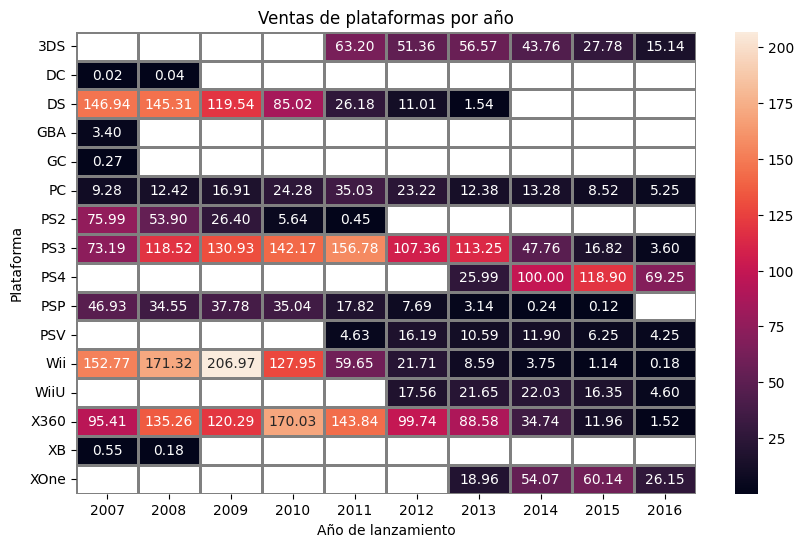

In [218]:
#mostramos un heatmap que nos identificará los que han ido desapareciendo y los que han estado apareciendo o subiendo sus ventas
plt.figure(figsize=(10, 6))
plt.title('Ventas de plataformas por año')
sns.heatmap(
    yearly_sales,
    annot=True,
    linewidths=1,
    fmt='.2f',
    linecolor='gray',)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Plataforma')

En base al grafico de mapa de calor, las plataformass que han ido creciendo conforme los años o han tenido ventas durante la mayoria de años seleccionados son los siguientes: 

PS4
PS3
Wii
PC

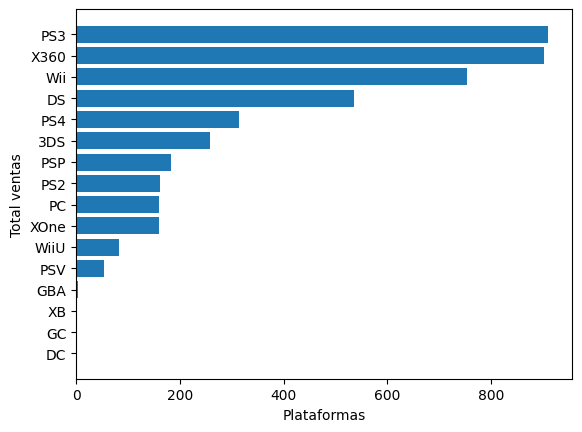

In [219]:
#plataformas lideres en ventas
leaders_sales = new_games.groupby('platform')['total_sales'].sum().sort_values().reset_index()
#plt.figure(figsize = (10,6))
plt.barh(leaders_sales['platform'], leaders_sales['total_sales'])
plt.xlabel('Plataformas')
plt.ylabel('Total ventas')
plt.show()

Segun el grafico, la plataforma lider en venta a partir del 2007 es el PS3 y el X360, dos consolas que brindan una mejor interfaz para el desarrollo de los videojuego y brindan un aspecto mas realista para dichos años (hasta el 2016)